In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
data=pd.read_csv("garments_worker_productivity.csv")
#data

In [4]:
#Basic Summary statistics of the data for the numerical variables 
summary_stats=data.describe(include="all")

In [5]:
summary_stats

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197,1197,1197,1197,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
unique,59,5,2,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,03-11-2015,Quarter1,sewing,Wednesday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,24,360,691,208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,NaN,NaN,NaN,NaN,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,NaN,NaN,NaN,NaN,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,NaN,NaN,NaN,NaN,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,NaN,NaN,NaN,NaN,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,NaN,NaN,NaN,NaN,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253


In [6]:
#basic Summary of the data for the number of working days, count of quarters in the year
unique_days=data['date'].nunique()
unique_quarters=data['quarter'].nunique()
print(unique_days)
print(unique_quarters)

59
5


In [7]:
#Mean and standard deviation of actual producivity for every quarter and Histogram plot of actual productivity based on every quarter and conclusion accordingly
productivity_by_quarter=data.groupby('quarter')['actual_productivity'].agg(['mean','std'])
productivity_by_quarter

,mean,std
quarter,,
Quarter1,0.751560,0.161318
Quarter2,0.743710,0.171114
Quarter3,0.704759,0.175614
Quarter4,0.709067,0.185983
Quarter5,0.826177,0.183851


C:\Python\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


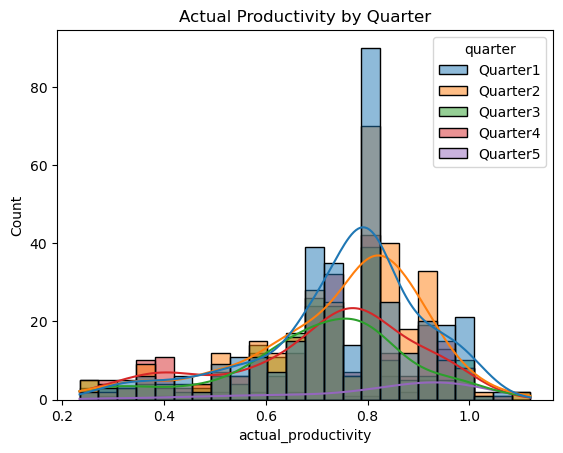

In [8]:
sns.histplot(data=data,x='actual_productivity',hue='quarter',kde=True)
plt.title("Actual Productivity by Quarter")
plt.show()

In [9]:
#Number count for sewing and finishing department 
department_counts=data['department'].value_counts()
department_counts

department
sewing       691
finishing    506
Name: count, dtype: int64

                mean       std
department                    
finishing   0.752951  0.197021
sewing      0.722013  0.154784


C:\Python\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


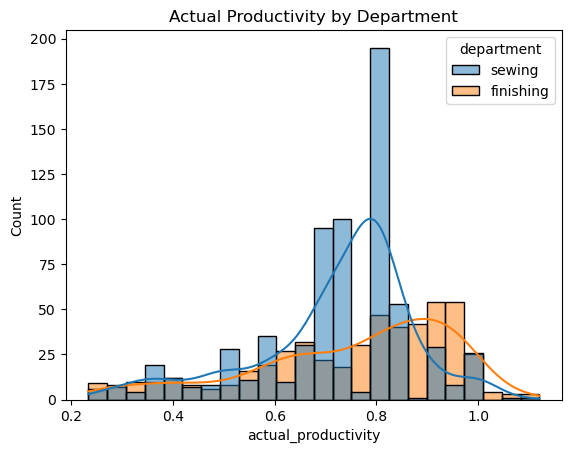

In [10]:
#Mean and standard deviation of actual producivity for sewing and finishing 
#Histogram plot of actual productivity based on both department and conclusion accordingly
productivity_by_dept=data.groupby('department')['actual_productivity'].agg(['mean','std'])
print(productivity_by_dept)
sns.histplot(data=data,x='actual_productivity',hue='department',kde=True)
plt.title("Actual Productivity by Department")
plt.show()

In [11]:
#Number count for  teams, smv across the year
team_count = data['team'].nunique()
smv_count = data['smv'].nunique()
print(team_count)
print(smv_count)

12
70


C:\Python\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


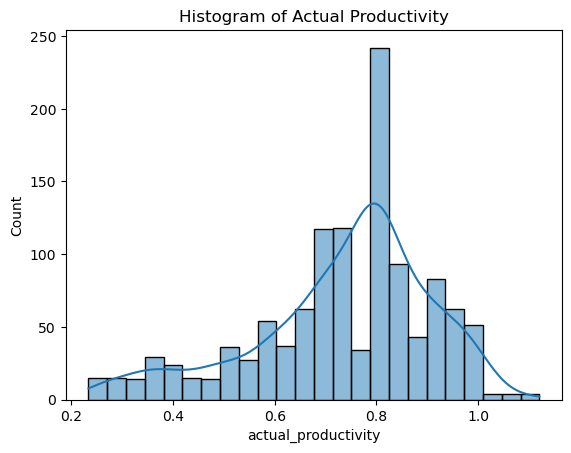

In [12]:
#Histogram & Box plot of actual productivity based on all working days, team size, quarterts and  Conclude accordingly 
sns.histplot(data=data, x='actual_productivity', kde=True)
plt.title("Histogram of Actual Productivity")
plt.show()

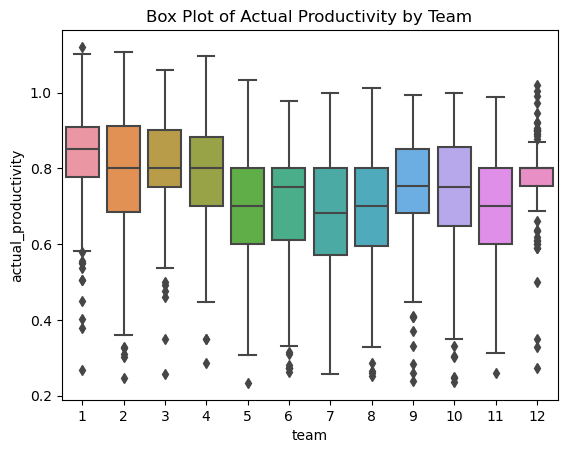

In [13]:
sns.boxplot(data=data, x='team', y='actual_productivity')
plt.title("Box Plot of Actual Productivity by Team")
plt.show()

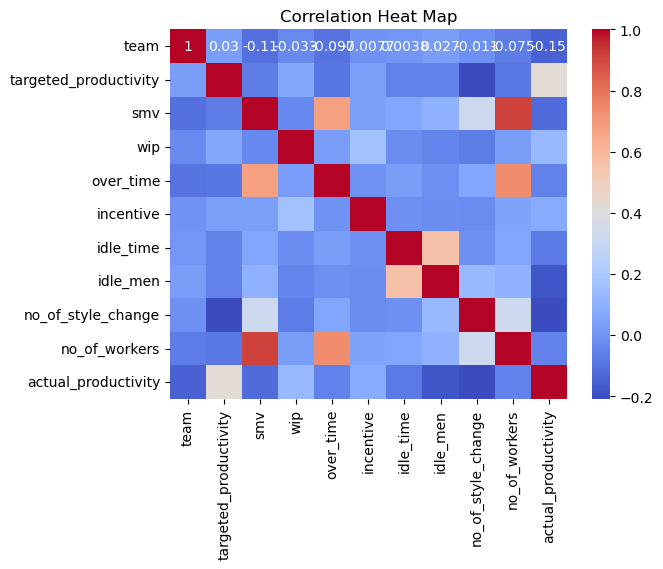

In [14]:
#Find correlation matrix and draw heat map for all variables
correlation_matrix = data.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heat Map")
plt.show()

In [33]:
#Conclude (Is the company able to meet target, are they giving incentives based on producitivity, does overtime have any effect on productivity)
target = (data['actual_productivity'] >= data['targeted_productivity']).mean()
incentive = data.groupby('incentive')['actual_productivity'].agg(['mean', 'std'])
overtime_effect = data.groupby('over_time')['actual_productivity'].agg(['mean', 'std'])
print("The company target(%) is:", target*100)
print("Effect of incentives on productivity:\n", incentive)
print("Effect of overtime on productivity:\n", overtime_effect)

The company target(%) is: 73.09941520467837
Effect of incentives on productivity:
                mean       std
incentive                    
0          0.712582  0.209871
21         0.452013       NaN
23         0.522832  0.106459
24         0.406101  0.004043
25         0.630403       NaN
26         0.645189  0.015661
27         0.466590  0.219744
29         0.520238       NaN
30         0.644110  0.090507
32         0.495618       NaN
33         0.626578       NaN
34         0.737292  0.033864
35         0.650325  0.000392
37         0.582301       NaN
38         0.753058  0.109892
40         0.683841  0.061997
44         0.647417  0.062487
45         0.752309  0.021734
46         0.550582  0.070732
49         0.624470  0.036314
50         0.784887  0.035617
53         0.850170       NaN
54         0.705577       NaN
55         0.793010  0.018854
56         0.755808  0.071292
60         0.823488  0.048021
62         0.800261       NaN
63         0.793762  0.017090
65         0.8419

In [39]:
#Find the correlation between actual and target productivity for every quarter and for every department. What do you conclude
correlation_actual_targeted = data.select_dtypes(include=[np.number])[['actual_productivity', 'targeted_productivity']].corr()
print(correlation_actual_targeted)

                       actual_productivity  targeted_productivity
actual_productivity               1.000000               0.421594
targeted_productivity             0.421594               1.000000
